Mean of the exploratory (independent) variable =  71.48
Mean of response (dependent) variable =  3606.45
Covariance between exploratory and response variables =  164363.1349
Variance of exploratory (independent) variable =  2522.3929
beta_1_hat (slope of the best fit straight line) =  65.161591
beta_0_hat (intercept of the best fit straight line) =  -1051.300525
Sum of Residuals of Predicted and Actual Response Values =  38.6
Sum Squared Residuals of Predicted and Actual Response Values =  496976681.8885
Correlation between Exploratory and Response variables =  0.8858
R-square between Exploratory and Response variables =  78.4578
Goodness of fit : 78.4578 % of the Response Variable values are explained by the line of best fit
     day    FL    GA  GU   MS    SC    TN
0      1    18    18  13   11    16    19
1      2    25    22  13   19    23    29
2      3    39    33  13   34    24    49
3      4    52    50  20   44    38    67
4      5    68    63  20   49    42    80
..   ...   .

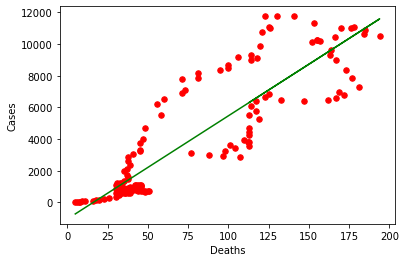

In [7]:
from __future__ import division
import pandas as pd
import math
from decimal import Decimal
import matplotlib.pyplot as plt


def data_range(x):
    return max(x) - min(x)



def mean(x):
    return round((sum(x) / len(x)), 2)



def diff_from_mean(x):
    x_bar = mean(x)
    return [round((x_i - x_bar), 2) for x_i in x]

def sum_of_squares(x):
    return(sum(x_i**2 for x_i in x))

def variance(x):
    l = len(x)
    deviations = diff_from_mean(x)
    return (sum_of_squares(deviations)/(l - 1))

def standard_deviation(x):
    v = variance(x)
    return math.sqrt(v)

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def covariance(x, y):
    n = len(x) # length of both x and y are required to be the same
    return (dot(diff_from_mean(x), diff_from_mean(y)))/ (n-1)


def correlation(x, y):
    sdev_x = standard_deviation(x)
    sdev_y = standard_deviation(y)
    if sdev_x > 0 and sdev_y > 0:
        return covariance(x,y)/(sdev_x * sdev_y)
    else:
        return 0
    

def get_y_pred(x, slope, intercept):
    return (x * slope + intercept)

def get_residuals(list1, list2):
    residuals = []
    i = 0
    while i < len(list1):
        residuals.append(round((list1[i] - list2[i]), 2))
        i+= 1
    return residuals

def get_ssr(list1, list2):
    res = get_residuals(list1, list2)
    ssr = 0
    i = 0
    while i < len(res):
        ssr = ssr + (res[i])**2
        i+= 1
    return ssr

def get_sum_residuals(list1, list2):
    res = get_residuals(list1, list2)
    sum_res = 0
    i = 0
    while i < len(res):
        sum_res += res[i]
        i+= 1
    return round(sum_res, 1)

def do_all_regression_stuff(x, y):
    mean_exploratory = mean(x)
    print('Mean of the exploratory (independent) variable = ', mean_exploratory)
    mean_response = mean(y)
    print('Mean of response (dependent) variable = ', mean_response)
    
    cov_xy = round(covariance(x, y), 4)
    print('Covariance between exploratory and response variables = ', cov_xy)
    var_x = round(variance(x), 4)
    print('Variance of exploratory (independent) variable = ', var_x)
    
    beta_1_hat = round((cov_xy/var_x), 6) # Slope of the best fit straight line
    print('beta_1_hat (slope of the best fit straight line) = ', beta_1_hat)
    beta_0_hat = round((mean_response - beta_1_hat * mean_exploratory), 6) # Intercept of the best fit straight line
    print('beta_0_hat (intercept of the best fit straight line) = ', beta_0_hat)
    
    response_value_list = []
    for x_i in x:
        response_value_list.append(round(get_y_pred(x_i, beta_1_hat, beta_0_hat), 2))
        # print('Response Value List = ', response_value_list)
        # print('------------------')
    #print('Response value list is ', response_value_list)
    plt.scatter(x, y, color='red', marker='o', s=30)
    plt.plot(x, response_value_list, color = "g")
    plt.xlabel('Deaths') 
    plt.ylabel('Cases')
    
    errors = get_residuals(y,response_value_list)
    #print('Errors or Residuals of Predicted Response value and Actual Exploratory value =', errors)
    
    response_sum_residuals = get_sum_residuals (y, response_value_list)
    print('Sum of Residuals of Predicted and Actual Response Values = ', response_sum_residuals)

    # print('===================')
    response_value_ssr = round(get_ssr(y, response_value_list), 4)
    print('Sum Squared Residuals of Predicted and Actual Response Values = ', response_value_ssr)
    
    r_xy = correlation(x, y)
    print('Correlation between Exploratory and Response variables = ', round(r_xy, 4))

    r_sq = r_xy**2 * 100
    print('R-square between Exploratory and Response variables = ', round(r_sq, 4))
    print('Goodness of fit :', round(r_sq, 4) , '% of the Response Variable values are explained by the line of best fit')
    
    newdf = pd.DataFrame({
        'X Mean':[mean_exploratory],
        'Y Mean':[mean_response],
        'Beta-0(Slope)': [beta_1_hat],
        'Beta-1(Intercept)': [beta_0_hat],
        'SumOfResiduals':[response_sum_residuals],
        'SumSquareResiduals':[response_value_ssr],
        'R-XY(Correlation)':[round(r_xy, 2)],
        'R-Square-XY':[round(r_sq, 2)],
        'Goodness of fit(%)':[round(r_sq,2)]
    })
    
    newdf = newdf[['X Mean', 'Y Mean', 'Beta-0(Slope)', 'Beta-1(Intercept)', 'SumOfResiduals', 'SumSquareResiduals', 'R-XY(Correlation)', 'R-Square-XY', 'Goodness of fit(%)']]
    
    return newdf


NewCases = pd.read_csv("sevenday_rolling_average_of_new_cases.csv").head(170) # converts .csv to dataframe
NewDeaths = pd.read_csv("sevenday_rolling_average_of_new_deaths.csv").head(170) # converts .csv to dataframe


do_all_regression_stuff(NewDeaths['FL'], NewCases['FL'])

print(NewCases)

